# 2019-yil uchun "M. Əcəmi" supermarketidagi savdo holati


In [90]:
#1 Barcha kerakli kutubxonalarni chaqirib olamiz
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import datetime as dt

In [91]:
#2 Kerakli datasetni githubdan df o'zgaruvchisiga yuklab olaman.
df = pd.read_csv("https://github.com/hikmatilloahatov/Azarbaijan-supermarkets-datasets/blob/main/M.%20%C6%8Fc%C9%99mi.csv?raw=true", usecols=list(range(1, 6)))
df.head(10)

,mahsulot_nomi,mahsulot_turi,mahsulot_narhi,sotilgan_vaqti,bonus_karta
0,KOLBASA CARICINO SINYUQA D/L/T QOST KG,Kolbasa va sosiskalar,26.05,2019-04-04,False
1,KONFET SLADUNICA XIT MILK KG,Shirinliklar,7.35,2019-04-04,False
2,XAN 0.7LT ARAQ CINAR,Aroq,7.75,2019-04-04,False
3,RUSSIAN SPEECH 700ML ARAQ SPECIAL QIRMIZI,Aroq,7.75,2019-04-04,False
4,SAKURA QRAFIN DEST,Maishiy buyumlar,19.75,2019-04-04,False
5,HARIBO 100GR JELEBON TEETH,Shirinliklar,1.15,2019-04-04,False
6,KONFET QALAN VAREJKA KG,Shirinliklar,5.50,2019-06-14,False
7,SOLEN 26GR BISCOLATA NIRVANA VAFLI KOKOSLU,Shirinliklar,0.50,2019-06-14,False
8,HALK 700GR PECENYE FINGER,Shirinliklar,3.50,2019-06-14,False
9,CAP PAPAQ 01150,To'qimachilik,11.50,2019-06-14,False


In [92]:
#3 DataFramening barcha ustunlari haqidagi ma'lumotga ega bo'lib olaman
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21069 entries, 0 to 21068
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   mahsulot_nomi   21069 non-null  object 
 1   mahsulot_turi   21069 non-null  object 
 2   mahsulot_narhi  21069 non-null  float64
 3   sotilgan_vaqti  21069 non-null  object 
 4   bonus_karta     21069 non-null  bool   
dtypes: bool(1), float64(1), object(3)
memory usage: 679.1+ KB


In [93]:
#4 DataFrameda NaN qiymatlar bor yoki yo'qligini tekshiraman
df.isnull().sum()

mahsulot_nomi     0
mahsulot_turi     0
mahsulot_narhi    0
sotilgan_vaqti    0
bonus_karta       0
dtype: int64

In [94]:
#5 "sotilgan_vaqti" ustunining ma'lumot turini objectdan datetime ma'lumot turiga o'tkazaman
df['sotilgan_vaqti'] = pd.to_datetime(df['sotilgan_vaqti'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21069 entries, 0 to 21068
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   mahsulot_nomi   21069 non-null  object        
 1   mahsulot_turi   21069 non-null  object        
 2   mahsulot_narhi  21069 non-null  float64       
 3   sotilgan_vaqti  21069 non-null  datetime64[ns]
 4   bonus_karta     21069 non-null  bool          
dtypes: bool(1), datetime64[ns](1), float64(1), object(2)
memory usage: 679.1+ KB


In [95]:
#6 Har bir oy uchun ma'lumotlar sonini ko'rib olaman
for i in range(1, 13):
  print(df[df['sotilgan_vaqti'].dt.month == i].shape[0])

2060
1995
2050
2158
2219
2055
2022
2381
2102
1996
31
0


In [96]:
#7 Demak tushunamanki, 12-oy uchun hech qanday ma'lumot yo'q, 11-oyda esa bor ammo ma'lumotlar juda oz 
# shuning uchun 11-oydagi ma'lumotlarni tashlab yuborsam bo'laveradi
df.drop(df[df['sotilgan_vaqti'].dt.month == 11].index, axis=0, inplace=True)
for i in range(1, 13):
  print(df[df['sotilgan_vaqti'].dt.month == i].shape[0])

2060
1995
2050
2158
2219
2055
2022
2381
2102
1996
0
0


In [98]:
#8 DataFrameni bir ko'rib olaman
df

,mahsulot_nomi,mahsulot_turi,mahsulot_narhi,sotilgan_vaqti,bonus_karta
0,KOLBASA CARICINO SINYUQA D/L/T QOST KG,Kolbasa va sosiskalar,26.05,2019-04-04,False
1,KONFET SLADUNICA XIT MILK KG,Shirinliklar,7.35,2019-04-04,False
2,XAN 0.7LT ARAQ CINAR,Aroq,7.75,2019-04-04,False
3,RUSSIAN SPEECH 700ML ARAQ SPECIAL QIRMIZI,Aroq,7.75,2019-04-04,False
4,SAKURA QRAFIN DEST,Maishiy buyumlar,19.75,2019-04-04,False
...,...,...,...,...,...
21064,LYUBIMIY 1LT M.SIRESI YABLOKO-PERSIK,Mevali sharbatlar,1.50,2019-08-08,False
21065,KENT 15GR QIRMIZI ISTIOT,Ziravorlar,0.50,2019-02-09,True
21066,HILLTOP 500GR QARA CAY OPA ROYAL CEYLON QUTU,Choy,9.15,2019-02-09,True
21067,ATVYORTKA KICIK,Maishiy buyumlar,1.20,2019-10-26,True


In [99]:
#9 2019-yilda "M. Əcəmi" supermarketida qaysi mahsulot turi nechta sotilgani haqida ma'lumotlarni olaman
df['mahsulot_turi'].value_counts().to_frame()

,mahsulot_turi
Shirinliklar,4867
Maishiy buyumlar,1169
"Yuvish vositalari, tozalagichlar",1063
Mevali sharbatlar,978
Idish-tovoq,806
...,...
Kefir,19
Shampan,17
Tayyor ovqatlar,10
Muzlatilgan mahsulotlar,9


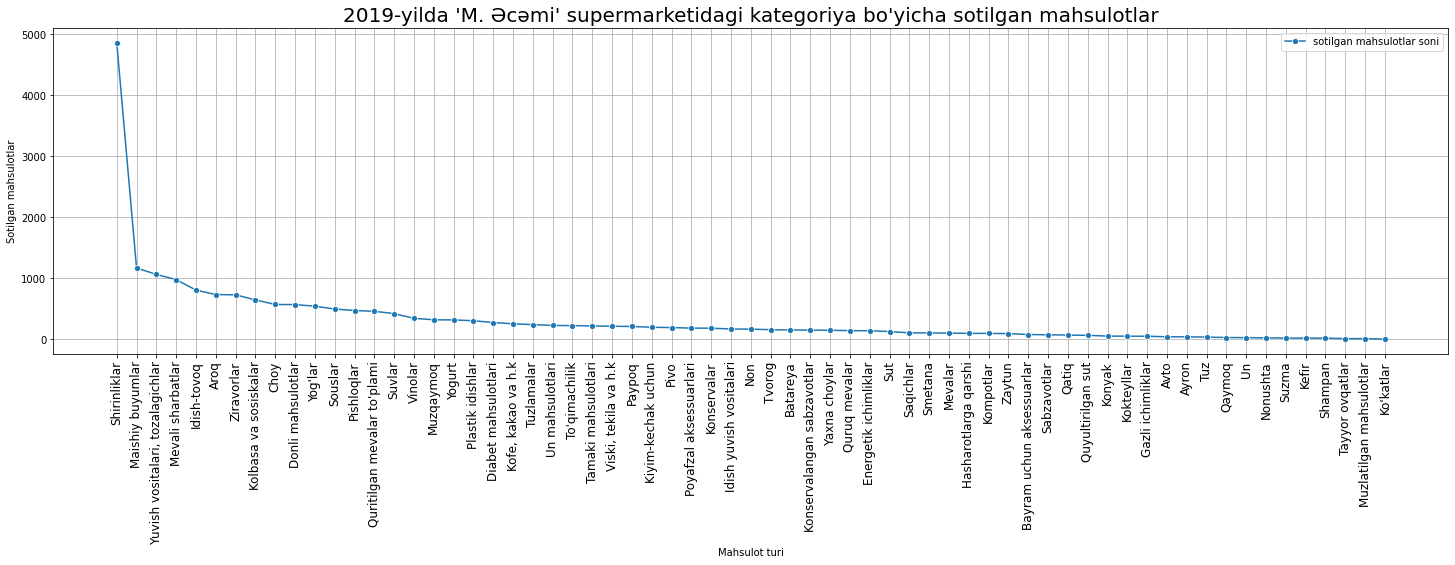

In [100]:
#9 Visualization
plt.figure(figsize=(25, 6))
sns.lineplot(data=df['mahsulot_turi'].value_counts().to_frame(), markers="o")

plt.xlabel("Mahsulot turi")
plt.ylabel("Sotilgan mahsulotlar")
plt.title("2019-yilda 'M. Əcəmi' supermarketidagi kategoriya bo'yicha sotilgan mahsulotlar", fontsize=20)

plt.grid()
plt.legend(["sotilgan mahsulotlar soni"])
plt.xticks(rotation=90, fontsize=12)
plt.show()

In [101]:
#10 2019-yilda "M. Əcəmi" supermarketida qaysi mahsulot turi qancha pul olib kelgani haqida ma'lumotni olaman
df.pivot_table(index=['mahsulot_turi'],
              values=['mahsulot_narhi'], 
              aggfunc=['sum'])

,sum
,mahsulot_narhi
mahsulot_turi,
Aroq,11289.01
Avto,203.12
Ayron,27.12
Batareya,620.63
Bayram uchun aksessuarlar,203.83
...,...
Yog'lar,5006.86
Yogurt,394.51


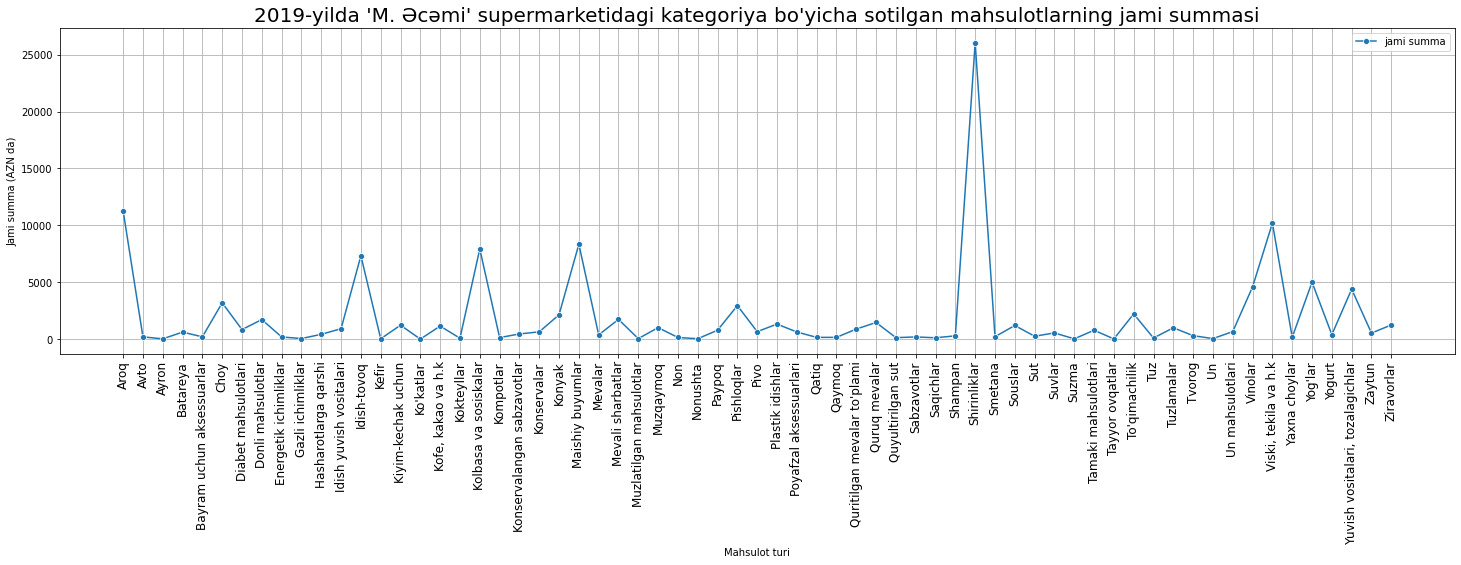

In [102]:
#10 Visualization
plt.figure(figsize=(25, 6))
sns.lineplot(data=df.pivot_table(index=['mahsulot_turi'], values=['mahsulot_narhi'], aggfunc=['sum']),
             markers="o")

plt.xlabel("Mahsulot turi")
plt.ylabel("Jami summa (AZN da)")
plt.title("2019-yilda 'M. Əcəmi' supermarketidagi kategoriya bo'yicha sotilgan mahsulotlarning jami summasi", fontsize=20)

plt.grid()
plt.legend(["jami summa"])
plt.xticks(rotation=90, fontsize=12)
plt.show()

In [103]:
#11 2019-yilda "M. Əcəmi" supermarketida nechta mijoz mahsulotni bonus karta orqali 
# xarid qilgan yoki qilmagani haqida haqida ma'lumotni olaman
bonus_df = df['bonus_karta'].value_counts().to_frame().T
bonus_df.columns = ["Bonus_kartasiz", "Bonus_karta_orqali"]
bonus_df.index = pd.Index(['xaridlar'])
bonus_df

,Bonus_kartasiz,Bonus_karta_orqali
xaridlar,10579,10459


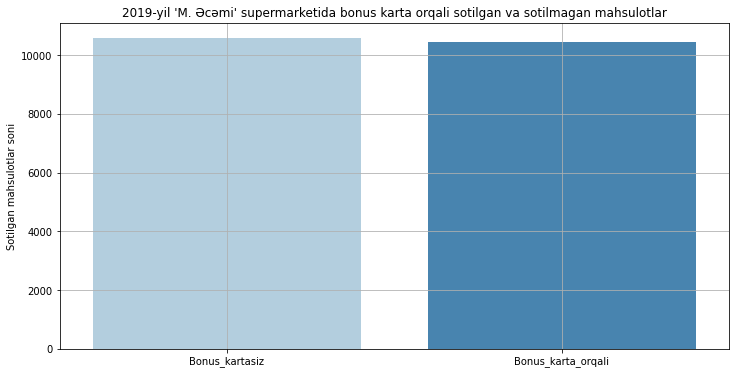

In [104]:
#11 Visualization
plt.figure(figsize=(12, 6))
sns.barplot(data=bonus_df, palette="Blues")

plt.title("2019-yil 'M. Əcəmi' supermarketida bonus karta orqali sotilgan va sotilmagan mahsulotlar")
plt.ylabel("Sotilgan mahsulotlar soni")

plt.grid()
plt.show()

In [105]:
#12 2019-yilda "M. Əcəmi" supermarketida oylarga nisbatan xaridlar soni haqida ma'lumotlarni aniqlab olaman
oylik_xaridlar = list()
oy_nomlari = ['Yanvar', 'Fevral', 'Mart', 'Aprel', 'May', 'Iyun', 'Iyul', 'Avgust', 'Sentabr', 'Oktabr']
for i in range(1, 11):
  oylik_xaridlar.append(df[df['sotilgan_vaqti'].dt.month == i].shape[0])
df1 = pd.DataFrame(index=oy_nomlari, data=oylik_xaridlar, columns=['oylik_xaridlar'])
df1

,oylik_xaridlar
Yanvar,2060
Fevral,1995
Mart,2050
Aprel,2158
May,2219
Iyun,2055
Iyul,2022
Avgust,2381
Sentabr,2102
Oktabr,1996


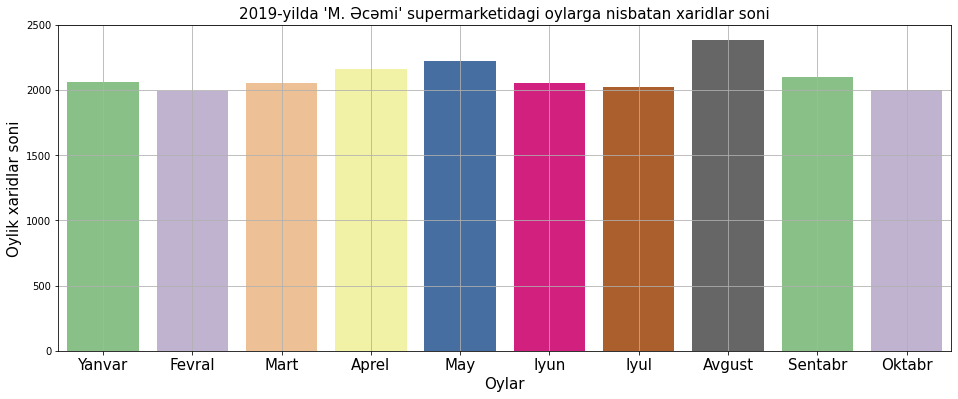

In [106]:
#12 Visualization
plt.figure(figsize=(16, 6))
sns.barplot(x=df1.index, y=df1['oylik_xaridlar'], palette='Accent')

plt.title("2019-yilda 'M. Əcəmi' supermarketidagi oylarga nisbatan xaridlar soni", fontsize=15)
plt.xlabel("Oylar", fontsize=15)
plt.ylabel("Oylik xaridlar soni", fontsize=15)

plt.xticks(fontsize=15)
plt.grid()
plt.show()

In [107]:
#13 2019-yilda "M. Əcəmi" supermarketida hafta kunlariga nisbatan xaridlar soni
hafta_kunlari_xaridlar = list()
kun_nomlari = ['Dushanba', 'Seshanba', 'Chorshanba', 'Payshanba', 'Juma', 'Shanba', 'Yakshanba']
for i in range(0, 7):
  hafta_kunlari_xaridlar.append(df[df['sotilgan_vaqti'].dt.weekday == i].shape[0])
df2 = pd.DataFrame(index=kun_nomlari, data=hafta_kunlari_xaridlar, columns=['xaridlar'])
df2

,xaridlar
Dushanba,2924
Seshanba,2914
Chorshanba,2885
Payshanba,3079
Juma,3125
Shanba,3020
Yakshanba,3091


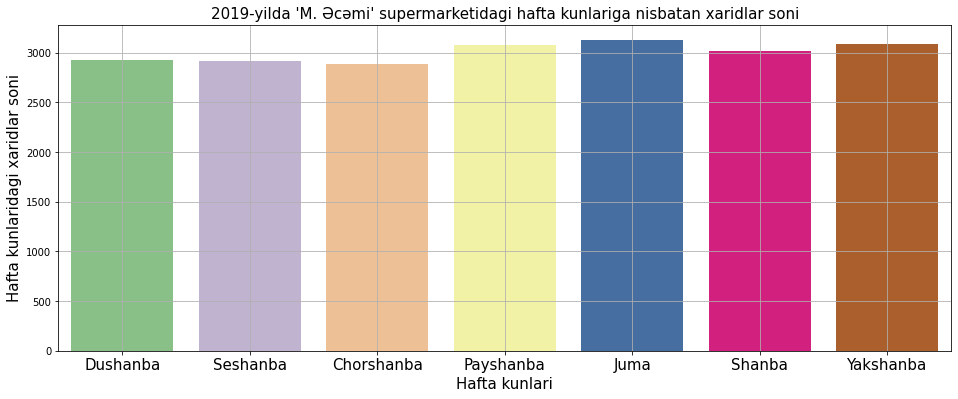

In [108]:
#13 Visualization
plt.figure(figsize=(16, 6))
sns.barplot(x=df2.index, y=df2['xaridlar'], palette='Accent')

plt.title("2019-yilda 'M. Əcəmi' supermarketidagi hafta kunlariga nisbatan xaridlar soni", fontsize=15)
plt.xlabel("Hafta kunlari", fontsize=15)
plt.ylabel("Hafta kunlaridagi xaridlar soni", fontsize=15)

plt.xticks(fontsize=15)
plt.grid()
plt.show()

In [109]:
#14 2019-yilda "M. Əcəmi" supermarketida oy kunlariga nisbatan xaridlar soni haqida ma'lumotlarni aniqlab olaman
oy_kunlari_xaridlar = list()
kunlar = list(range(1, 32))
for i in range(1, 32):
  oy_kunlari_xaridlar.append(df[df['sotilgan_vaqti'].dt.day == i].shape[0])
df3 = pd.DataFrame(index=kunlar, data=oy_kunlari_xaridlar, columns=['xaridlar'])
df3

,xaridlar
1,680
2,605
3,749
4,590
5,680
6,748
7,729
8,679
9,713
10,594


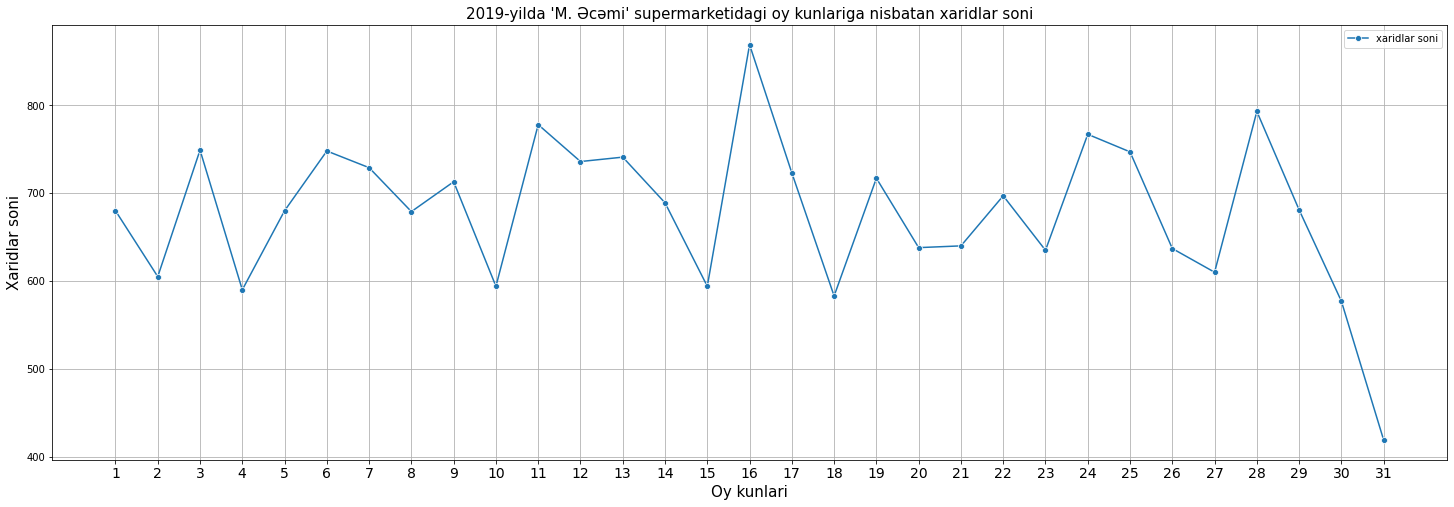

In [110]:
#14 Visualization
plt.figure(figsize=(25, 8))
sns.lineplot(data=df3, markers="o")

plt.title("2019-yilda 'M. Əcəmi' supermarketidagi oy kunlariga nisbatan xaridlar soni", fontsize=15)
plt.xlabel("Oy kunlari", fontsize=15)
plt.ylabel("Xaridlar soni", fontsize=15)

plt.legend(["xaridlar soni"])
plt.grid()
plt.xticks(kunlar, fontsize=14)
plt.show()

In [111]:
#15 2019-yil 'M. Əcəmi' supermarketidagi har bir oyning har bir kunidagi xaridlar sonini aniqlab olaman
# buning uchun while loopdan foydalandim
oy_sanalari = list()
oy = 1
kun = 1
while kun<=31 and oy<=10:
    oy_sanalari.append(df[(df['sotilgan_vaqti'].dt.month == oy) & (df['sotilgan_vaqti'].dt.day == kun)].shape[0])
    kun +=1
    if kun == 32:
        oy+=1
        kun=1

In [112]:
len(oy_sanalari)

310

In [113]:
arr = np.array(oy_sanalari).reshape(10, 31)

In [114]:
df5 = pd.DataFrame(index=oy_nomlari, data=arr, columns=list(range(1, 32)))

In [115]:
df5

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31
Yanvar,71,27,109,41,69,86,78,59,72,33,86,101,90,59,55,89,66,36,79,73,65,58,55,63,101,52,63,53,51,48,72
Fevral,83,83,83,43,66,69,81,83,53,57,51,100,93,67,77,97,60,69,48,61,73,45,65,63,83,80,77,85,0,0,0
Mart,58,76,39,67,57,44,22,59,48,50,55,29,142,123,103,99,53,78,81,44,74,120,59,89,41,57,47,60,36,42,98
Aprel,81,34,91,42,76,26,96,57,53,40,71,113,64,84,49,65,101,59,76,71,51,63,92,91,100,69,60,89,88,106,0
May,55,54,73,61,90,85,68,75,112,51,94,59,55,58,38,63,91,93,102,55,49,82,51,72,57,73,82,78,90,83,70
Iyun,47,78,29,60,59,86,72,115,79,46,80,43,27,74,43,62,85,47,62,66,84,74,83,83,55,71,89,96,91,69,0
Iyul,64,55,81,62,37,70,67,95,65,103,44,87,70,56,63,102,67,69,89,69,58,55,33,48,79,36,40,80,88,52,38
Avgust,87,59,66,93,115,96,83,61,96,76,98,75,56,76,60,91,89,55,49,74,38,71,71,64,133,57,74,41,82,99,96
Sentabr,44,70,82,59,73,95,74,29,75,87,104,57,88,61,33,114,65,50,83,32,89,55,77,84,35,72,53,109,106,47,0
Oktabr,90,69,96,62,38,91,88,46,60,51,95,72,56,31,73,87,46,27,48,93,59,74,49,110,63,70,25,102,49,31,45


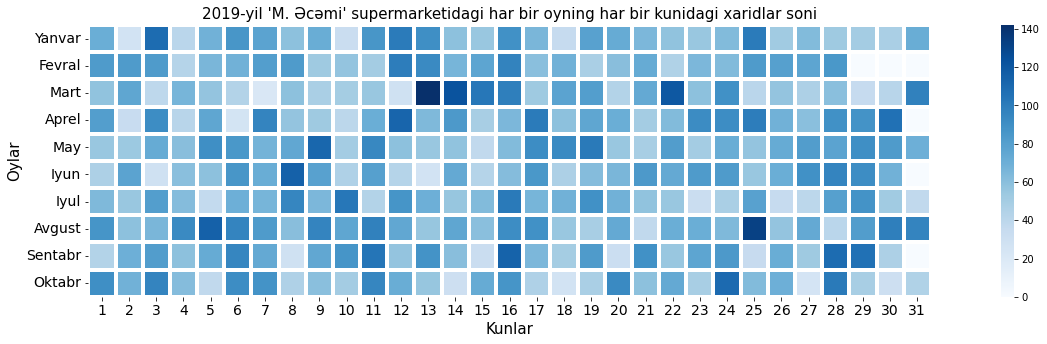

In [116]:
#15 Visualisation
plt.figure(figsize=(25, 5))
sns.heatmap(data=df5, linewidth=3, cmap="Blues", square=True)

plt.title("2019-yil 'M. Əcəmi' supermarketidagi har bir oyning har bir kunidagi xaridlar soni", fontsize=15)
plt.xlabel("Kunlar", fontsize=15)
plt.ylabel("Oylar", fontsize=15)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

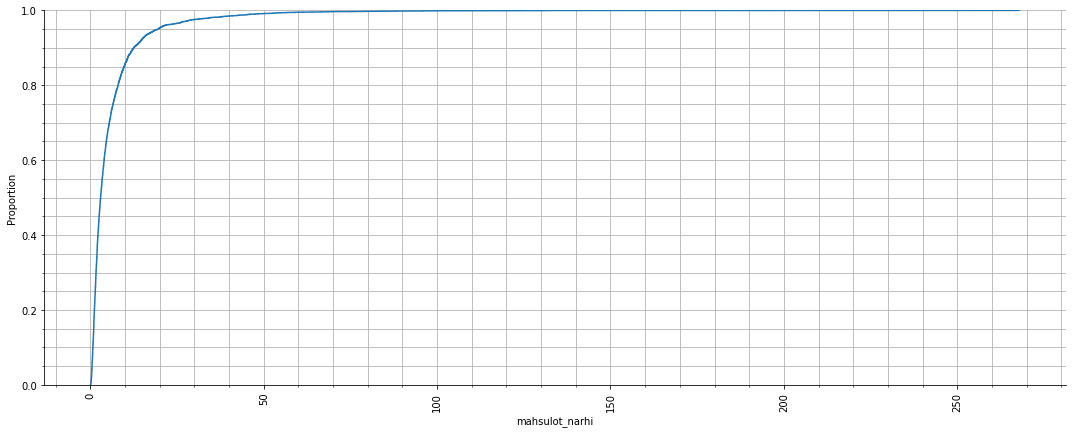

In [118]:
#16 Ko'rinadiki, sotilgan mahsulotlarning 50% i 3 azngacha, 90% i esa 12 azngacha bo'lgan mahsulotlar
sns.displot(data=df, x='mahsulot_narhi', kind='ecdf', height=6, aspect=2.5)
plt.xticks(rotation=90)
plt.grid(which='both')
plt.minorticks_on()
plt.show()